In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Legendre import *
from CACTUS import * 
from ipywidgets import interact
import scipy.interpolate as interp
from scipy.integrate import simps

In [3]:
data = Cn2.read_csv('/scratchm/eklotz/Cn2_Tenerife.csv')
data.rm_zeros()
data.set_ground_level(inplace = True)
data.filtre(50)

100%|██████████| 4/4 [00:00<00:00, 519.69it/s]

Applying filter : 


In [4]:
def int(x,t):
    x = np.array(x)
    t = np.array(t)
    dt = t[1:]-t[:-1]
    return np.sum(x[:-1]*dt)

In [5]:
def pp(date, nbsegments, nbpoints_per_segment):
    r0 = lambda x, t : np.power((0.423*(2*np.pi/1.55e-6)**2*int(x, t)), (-3/5))
    theta0 = lambda x, t : np.power((2.914*(2*np.pi/1.55e-6)**2 * int(x*np.power(t, (5/3)), t)), (-3/5))*1e6
    tau0 = lambda Cn2, wspeed, t : np.power((2.914*(2*np.pi/1.55e-6)**2 *
                                int(Cn2*np.power(wspeed, (5/3)), t)), (-3/5))

    alt = data[date].alt.values
    cn2 = data[date].Cn2.values
    wspeed = data[date].wspeed.values


    plt.figure(figsize=(20,10))

    plt.subplot(121)
    print(f'Integrale du profil brut : {int(cn2, alt)}')
    print(f'r0 du profil brut : {r0(cn2, alt):.4f} cm ')
    print(f'theta0 du profil brut : {theta0(cn2, alt):.4f} µrad ')
    print('\n')
   
    plt.semilogx(cn2, alt, label = 'Raw Cn2 profile', color='orange')
   
   
    g = interp.interp1d(alt, cn2)
    new_z = np.linspace(alt[0], alt[-1], nbpoints_per_segment*nbsegments)
    #plt.semilogx(g(new_z), new_z, label = 'Interpolated Cn2 profile')
    print(f'Integrale du profil interpolé : {int(g(new_z), new_z)}')
    print(f'r0 du profil interpolé : {r0(g(new_z), new_z):.4f} cm')
    print(f'theta0 du profil interpolé : {theta0(g(new_z), new_z):.4f} µrad ')
    print('\n')
    plt.xlabel('Cn2')
    plt.ylabel('Alt (m)')
    plt.autoscale(tight=True)
    plt.legend()
   
   
   
   
    if nbsegments >1:
        split_alt = np.array_split(alt, nbsegments)
        split_cn2 = np.array_split(cn2, nbsegments)
        roots, res = interp_gauss_legendre_pp(nbpoints_per_segment, split_alt, split_cn2)
        for k in split_alt:
            plt.axhline(k[0], linestyle='--', color = 'grey', linewidth = 0.5)
    else : 
        roots, res = interp_gauss_legendre(nbpoints_per_segment, alt, cn2, norm=True)

    plt.semilogx(res, roots, label = 'Legendre Cn2 profile')
    print(f'Integrale du profil Legendre : {int(res, roots)}')
    print(f'r0 du profil Legendre : {r0(res, roots):.4f} cm')
    print(f'theta0 du profil Legendre : {theta0(res, roots):.4f} µrad ')
    print('\n')
    plt.xlabel('Cn2')
    plt.ylabel('Alt (m)')
    plt.autoscale(tight=True)
    plt.legend()



    plt.subplot(122)
    print(f'temps de cohérence du profil brut : {tau0(cn2, wspeed , alt):.4f} sec ')
    plt.plot(wspeed, alt, label = 'Wind Speed')
    f = interp.interp1d(alt, wspeed)
    plt.plot(f(roots), roots, 'ro--', label = 'Interpolated Wind Speed')
    print(f'temps de cohérence du profil interpolé : {tau0(res, f(new_z), new_z):.4f} sec ')
    print(f'temps de cohérence du profil Legendre : {tau0(res, f(roots), roots):.4f} sec ')
    plt.xlabel('Win Speed (m.s^-1')
    plt.ylabel('Alt (m)')
    plt.autoscale(tight=True)
    plt.legend()

In [6]:
interact(pp, date = data.dates, nbsegments = 10, nbpoints_per_segment = 10)

interactive(children=(Dropdown(description='date', options=('2020-01-01 23:00:00', '2020-01-02 11:00:00', '202…

<function __main__.pp(date, nbsegments, nbpoints_per_segment)>

In [7]:
r0 = lambda x, t : np.power((0.423*(2*np.pi/1.55e-6)**2*int(x, t)), (-3/5))
theta0 = lambda x, t : np.power((2.914*(2*np.pi/1.55e-6)**2 * int(x*np.power(t, (5/3)), t)), (-3/5))*1e6
tau0 = lambda Cn2, wspeed, t : np.power((2.914*(2*np.pi/1.55e-6)**2 *
                            int(Cn2*np.power(wspeed, (5/3)), t)), (-3/5))

alt = data[0].alt.values
cn2 = data[0].Cn2.values
wspeed = data[0].wspeed.values


Integrale du profil brut : 4.357010616078578e-12
r0 du profil brut : 0.1292 cm 
theta0 du profil brut : 6.1295 µrad 




NameError: name 'nbpoints_per_segment' is not defined

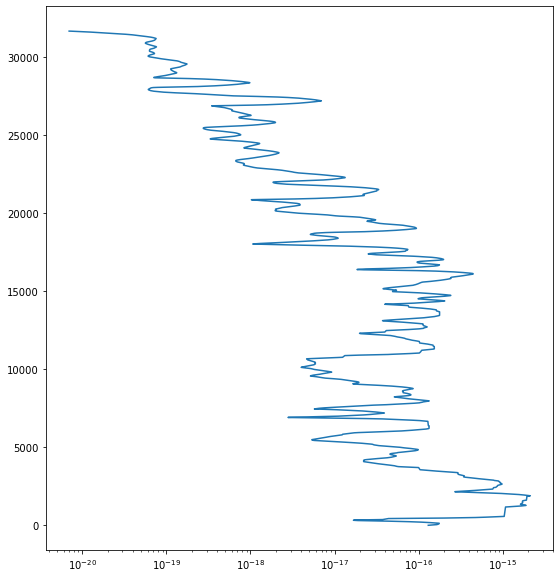

In [8]:
    plt.figure(figsize=(20,10))

    plt.subplot(121)
    print(f'Integrale du profil brut : {int(cn2, alt)}')
    print(f'r0 du profil brut : {r0(cn2, alt):.4f} cm ')
    print(f'theta0 du profil brut : {theta0(cn2, alt):.4f} µrad ')
    print('\n')
   
    plt.semilogx(cn2, alt, label = 'Raw Cn2 profile')
   
   
    g = interp.interp1d(alt, cn2)
    new_z = np.linspace(alt[0], alt[-1], nbpoints_per_segment*nbsegments)
    plt.semilogx(g(new_z), new_z, label = 'Interpolated Cn2 profile')
    print(f'Integrale du profil interpolé : {int(g(new_z), new_z)}')
    print(f'r0 du profil interpolé : {r0(g(new_z), new_z):.4f} cm')
    print(f'theta0 du profil interpolé : {theta0(g(new_z), new_z):.4f} µrad ')
    print('\n')
    plt.xlabel('Cn2')
    plt.ylabel('Alt (m)')
    plt.autoscale(tight=True)
    plt.legend()
   

In [ ]:
r0(cn2, alt)